In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [22]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
df.shape

(205, 26)

In [24]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [25]:
y = df_encoded["price"]
x = df_encoded.drop("price", axis=1)

In [26]:
x = x.fillna(x.mean())
y = y.fillna(y.mean())

In [27]:
m = len(df_encoded)
split_index = int(0.8 * m)

In [28]:
x_train = x.iloc[:split_index].values.astype(float)
y_train = y.iloc[:split_index].values.astype(float)
x_test = x.iloc[split_index:].values.astype(float)
y_test = y.iloc[split_index:].values.astype(float)

In [29]:
mu = np.mean(x_train, axis=0)
sigma = np.std(x_train, axis=0)

sigma[sigma == 0] = 1

x_train = (x_train - mu) / sigma
x_test = (x_test - mu) / sigma

def predict(x, w, b):
    return np.dot(x, w) + b

def compute_cost(x, y, w, b):
    m = len(y)
    predictions = predict(x, w, b)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def compute_gradient(x, y, w, b):
    m = len(y)
    predictions = predict(x, w, b)
    dj_dw = (1 / m) * np.dot(x.T, (predictions - y))
    dj_db = (1 / m) * np.sum(predictions - y)
    return dj_dw, dj_db

def gradient_descent(x, y, w, b, alpha, iterations):
    cost_history = []
    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)

        if i % 200 == 0:
            print(f"Iteration {i}: Cost {cost:.2f}")

    return w, b, cost_history
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [30]:
n = x_train.shape[1]
w_init = np.zeros(n)
b_init = 0
alpha = 0.05
iterations = 1000

In [31]:
w_final, b_final, cost_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations)

Iteration 0: Cost 92914178.52
Iteration 200: Cost 242224.96
Iteration 400: Cost 192044.33
Iteration 600: Cost 166195.39
Iteration 800: Cost 150835.43


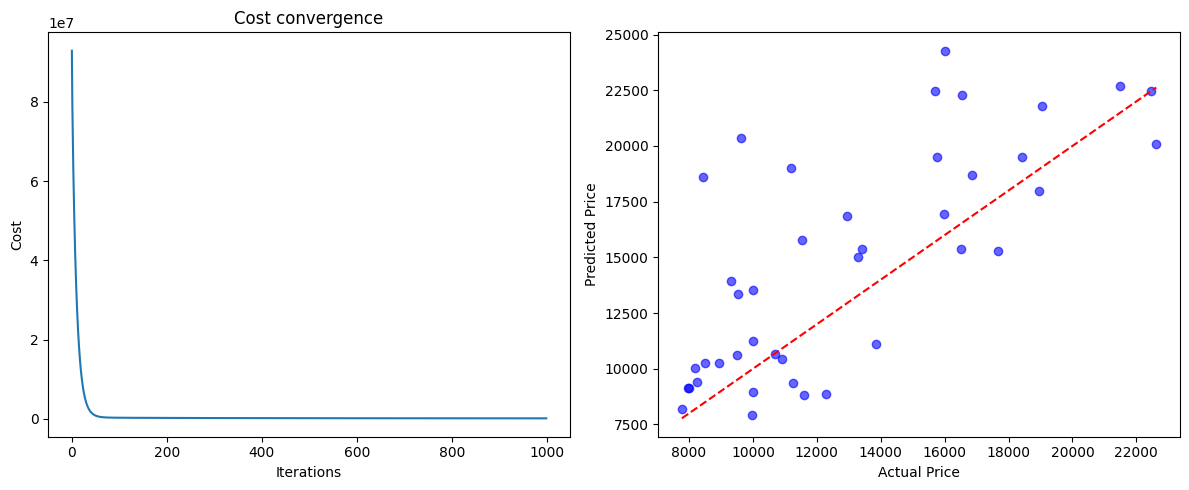

In [32]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost convergence")
plt.subplot(1, 2, 2)
test_predictions = predict(x_test, w_final, b_final)
plt.scatter(y_test, test_predictions, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.tight_layout()
plt.show()

In [33]:
print(f"\nResults with {n} features:")
print(f"Train RMSE: {rmse(y_train, predict(x_train, w_final, b_final)):.2f}")
print(f"Test RMSE: {rmse(y_test, test_predictions):.2f}")


Results with 190 features:
Train RMSE: 530.76
Test RMSE: 3855.29
